In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
date_parser= lambda x: pd.to_datetime(x, format = '%m/%d/%y' )
df1=pd.read_csv(".\clicks_original.csv",index_col='date',parse_dates=True ,date_parser=date_parser)
df1

C:\Users\dell\AppData\Local\Temp\ipykernel_492\2170709721.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df1=pd.read_csv(".\clicks_original.csv",index_col='date',parse_dates=True ,date_parser=date_parser)


,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784
2008-04-02,43.079056,1,24738
2008-04-03,43.842609,2,15209
2008-04-04,43.312376,1,14018
2008-04-05,43.941176,1,11974
...,...,...,...
2008-08-09,44.182033,1,6716
2008-08-10,43.608260,1,9523
2008-08-11,43.553363,1,8881


In [16]:
df1_m=pd.read_csv(".\clicks_missing.csv",index_col='date',parse_dates=True,date_format='%m/%d/%y')
df1_m

,price,location,clicks
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0
...,...,...,...
2008-08-09,44.182033,1,6716.0
2008-08-10,43.608260,1,9523.0
2008-08-11,43.553363,1,8881.0


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2008-04-01 to 2008-08-13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     135 non-null    float64
 1   location  135 non-null    int64  
 2   clicks    135 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.2 KB


In [18]:
df1_m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2008-04-01 to 2008-08-13
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     135 non-null    float64
 1   location  135 non-null    int64  
 2   clicks    119 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.2 KB


In [19]:
df1_m=df1_m.rename(columns={'clicks':'missing'})
df1_m

,price,location,missing
date,,,
2008-04-01,43.155647,2,18784.0
2008-04-02,43.079056,1,24738.0
2008-04-03,43.842609,2,15209.0
2008-04-04,43.312376,1,14018.0
2008-04-05,43.941176,1,11974.0
...,...,...,...
2008-08-09,44.182033,1,6716.0
2008-08-10,43.608260,1,9523.0
2008-08-11,43.553363,1,8881.0


In [31]:
columns=df1_m.loc[:,'missing':].columns.tolist()
len(columns)


1

In [37]:
def plot_dfs(df1, df2, col, title=None, xlabel=None, ylabel=None):
    '''	
    df1: original dataframe without missing data
    df2: dataframe with missing data
    col: column name that contains missing data
    '''    
    df_missing = df2.rename(columns={col: 'missing'})
    
    columns = df_missing.loc[:, 'missing':].columns.tolist()
    subplots_size = len(columns)
    
    # subplots_size = df2.shape[1]
    fig, ax = plt.subplots(subplots_size+1, 1, sharex=True)
    plt.subplots_adjust(hspace=0.25)
    fig.suptitle = title 
    
    df1[col].plot(ax=ax[0], figsize=(10, 16))
    ax[0].set_title('Original Dataset')
    ax[0].set_xlabel(xlabel)
    ax[0].set_ylabel(ylabel)    
    
    for i, colname in enumerate(columns):
        df_missing[colname].plot(ax=ax[i+1])
        ax[i+1].set_title(colname)

    plt.show()


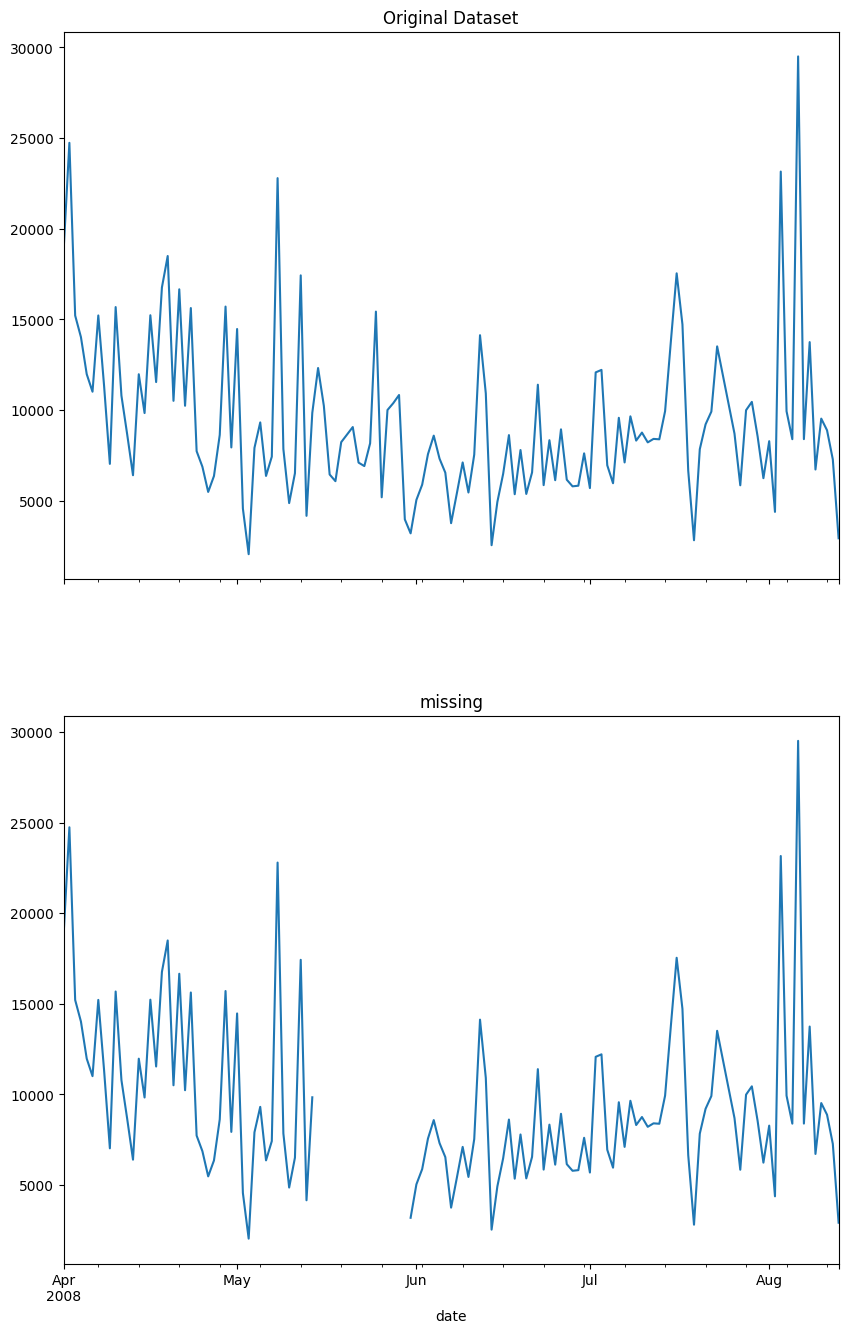

In [34]:
plot_dfs(df1,df1_m,'clicks')